<h1>Chapter 1.4.3 Geometric Transformations of Images</h1>

In [202]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [203]:
img = cv2.imread('dog.jpg')

# cv2.resize()를 통해 이미지 사이즈 조정(확대/축소)
res = cv2.resize(img, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)

In [204]:
cv2.namedWindow('image')
while(1):
  cv2.imshow('image', res)
  k = cv2.waitKey(1) & 0xFF # 1msec 동안 입력을 대기받는다. 그 결과를 비트연산자로 0xFF와 AND 연산하여 8비트값으로 만듦. -> 입력받은 값에서 8비트 값만 추출
  if k == 27: # 입력받은 값이 27와 같은지 확인. 여기서 27은 'Esc'키를 의미.
    break

cv2.destroyAllWindows()

In [205]:
img = cv2.imread('dog.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],
                [0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Rotate(돌림)

In [206]:
img = cv2.imread('dog.jpg')
rows,cols = img.shape[:2]
# cols의 1/4지점, rows의 1/4지점에서 45도만큼 역시계방향으로 돌림
M = cv2.getRotationMatrix2D((cols/4,rows/4),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

AffineTransform


안되는 조건: 영상의 대상이 정면에서 찍히지 않았을 경우(즉, 사각형의 경우 측면에서 찍어 축의 하나가 평행되지 않게 보이는 경우)

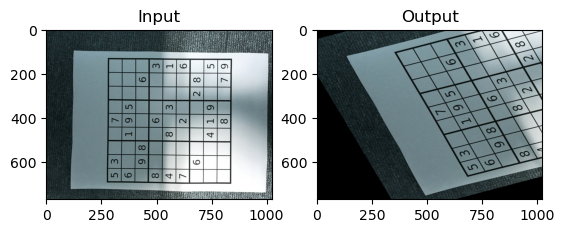

In [207]:
img = cv2.imread('drawing.png')
rows,cols,ch = img.shape

# 3개의 좌표 이동을 통해 AffineTransform을 한다.
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

Perspective Transformation

좌표 4개를 이동하여 기울기를 맞춤(Office Lens앱 처럼)

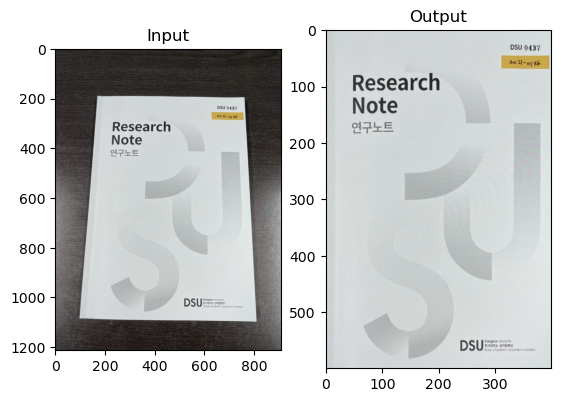

In [208]:
img = cv2.imread('./dataset/IMG_6504.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[170,190],[760,196],[808,1096],[100,1080]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [209]:
cv2.destroyAllWindows()

cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1